# Quantum Number Random Number Generation (QRNG)
_by Ashraf Boussahi_ 

## What's Randomness, and what is a random number?

Intentionally, randomness can be described as a set of events that cannot be fully predicted or guessed with certainty and is often referred to as luck. Indeed there is an entire branch of science dedicated to studying, analyzing, and trying to predict these uncertain events, and measuring their likelihood—this is called probability: the science of uncertainty. From a scientific standpoint, luck can be somewhat measured, and there are many techniques to enhance it. So, next time instead of blaming your lack of luck, consider taking a course on probability—I recommend the [MITx course on edX](https://www.edx.org/learn/probability/massachusetts-institute-of-technology-probability-the-science-of-uncertainty-and-data)!

A random number, as the term suggests, is a number generated randomly through what is known as a "Random Number Generator" or RNG, making it essentially impossible to predict with certainty. This output can be applied in various important fields due to its unique property of unpredictability.

## What's an RNG and how does it work?
An RNG, or Random Number Generator as a general concept is a mechanism that can generate numbers with the essential property of unpredictability, using various techniques, principles, and algorithms. An RNG can take many forms, such as a dice, a game wheel, a Galton Board, a classical computer, or even a quantum computer.

But how can we determine if a number is truly random?

To do so, we need to examine its generator and analyze both the quality of the generator and the process it uses to produce the number. There are plenty of algorithms and advanced techniques to assess the quality of a generator and determine the randomness of its outputs that we will cover later on such as the [Statistical tests](https://en.wikipedia.org/wiki/Randomness_test) that check for patterns or biases in the output, and the [NIST (National Institute of Standards and Technology)](https://nvlpubs.nist.gov/nistpubs/legacy/sp/nistspecialpublication800-22r1a.pdf) Test Suite

We can identify some features or characteristics that should be present to classify a number as random:

- **Unpredictable:** In a sequence of random numbers, the next value cannot be determined based on previous values.
- **Unreproducible:** For large-scale random number generation (especially when generating large numbers), it is crucial that this value cannot easily be reproduced at that level.
- **Uniformly Distributed:** After a long series of random generations, all possible values should appear with equal likelihood, showing no bias toward any specific value.


## Does it really matter if a number is truly randomly generated?


Actually, Yes, it’s crucial and the reason lies in the main applications of randomly generated numbers, which are used in critical fields and in almost every area of study that requires experimentation or confidentiality, and any small bias could lead to disaster results and catastrophic results because sometimes even if a number appears random on a small scale,  we can easily detect patterns in large-scale data, which can compromise the randomness and the results they are are based on it.


## What are the main uses of Random Numbers?

- **Security & Cryptography:**
Random generation of numbers can be considered the core of all encryption methods responsible for securing sensitive information and keeping it away from unwanted persons who may intercept the process of sharing it. This is actually achieved through cryptography.

Almost all cryptographic algorithms that encode our confidential materials online (bank accounts, passwords, data sharing, and network tokens) rely on randomly generated numbers. These values are created using classical computers and advanced calculations, which are grounded in strict scientific principles.

So, are these numbers really random?
To answer this question, we need to understand where they come from. As mentioned above, most of them rely on complex algorithms and formulas. But aren’t these methods deterministic? How can they generate something random every time?

In reality, the generated numbers aren’t truly random, but their statistical properties make them appear random. Why is that? Let’s take a hands-on example:

One of the algorithms commonly used is the LCG (Linear Congruential Generator), which employs this simple formula:

$$X_{n+1} = (a X_n + c) \mod m$$

with 
$X_0$ : the starting value or the **seed**

$a$ : multiplier

$c$ : increment

$m$ : the modulus

_*Note*: The parameters $a$, $c$, and $m$ are predefined by each implementation of the LCG algorithm and may be subject to certain criteria. To learn more about these parameters and how they are used, please refer to [this article on Wikipedia](https://en.wikipedia.org/wiki/Linear_congruential_generator)._

_For this example, we will use the same parameter values as in the [Numerical Recipes book](https://numerical.recipes/book.html)._

Now, let's write a simple code to generate a random sequence with $N$ numbers.

In [27]:
def LCG(seed, N, min, max): # min and max are used to scale the random number to the desired range
    Seq = []
    a = 1664525 #The predefined parameters
    c = 1013904223
    m = 2**32
    for i in range(N):
        seed = (a * seed + c) % m  # Update the seed using the LCG formula
        random_num = min + (seed % (max - min))  # Scale the output to the desired range (+1 to make the max value included)
        Seq.append(random_num)

    return Seq

# Generate the sequence, setting the seed to be 2004
LCG(5, 10, 0, 9)


[8, 7, 4, 6, 3, 3, 8, 6, 3, 7]

To see the distribution of these random numbers, we need to generate a larger sequence and plot a histogram:

In [28]:
# Generate a large sequence of random numbers
sequence = LCG(5, 10000, 0, 10)

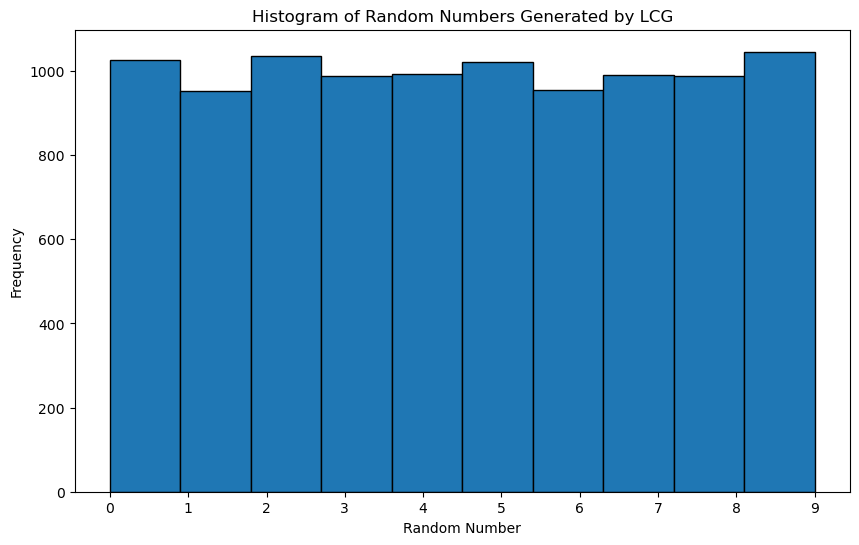

As we can see, the generated sequence is uniform and does not show a strong bias toward any of the possible values, which makes the sequence appear statistically random.

But why do we say that these numbers aren’t truly random?

### The Seed Problem:
The LCG algorithm we used above generates the sequence of random numbers through a deterministic process, starting from an initial value called the seed $X_0$ so, what happens if we generate another random sequence starting from the same seed? Will the sequences be different? Let’s see:

We will fix the seed to 1954, set the sequence length to 20, and choose the minimum value to be 0 and the maximum value to be 100, so if the two sequences were truly randomly generated, they would be different each time.


*What is the probability of them being the same if they are truly randomly generated?*

- We assume that we have two randomly generated sequences, both generated independently.
- Each value in each sequence has 100 possible values, so the probability for each value to appear is $\frac{1}{100}$
- The sequence length is 20 for each.

So the probability of having an exact match between two truly randomly generated sequences is:

$$P_{match} = \left( \frac{1}{100} \right)^{20} = 10^{-40}$$

which is literally:
0.0000000000000000000000000000000000000001

This is effectively 0, meaning we would need an enormous amount of luck to get two sequences with exactly the same 20 values.

Let’s try our chance, maybe today is our lucky day!

In [30]:
#Let's generate the first sequence with 1954 as  our fixed seed in both sequences:

LCG(1954, 20, 0, 100)

[73, 40, 47, 46, 29, 0, 75, 54, 13, 36, 19, 18, 69, 64, 83, 58, 61, 88, 35, 62]

In [31]:
# Now the second one with the same parameters:

LCG(1954, 20, 0, 100)

[73, 40, 47, 46, 29, 0, 75, 54, 13, 36, 19, 18, 69, 64, 83, 58, 61, 88, 35, 62]

Aren't they the same!!!
So, either today we have spent all the luck of our lives, or there's something else going on.

What if we changed the seed value?

In [33]:
#The new seed is 1962
LCG(1962, 20, 0, 100)

[73, 84, 67, 98, 97, 92, 47, 58, 17, 48, 3, 26, 53, 84, 55, 30, 33, 16, 79, 90]

Now, the results are extremely different.

So, we can conclude that the presence of the seed in these algorithms makes the values generated reproducible, which means the values we have are not truly random and could pose a risk.

### The Risks of Seed-Based Encryption:

To understand how dangerous it is to have numbers that are not truly random and can be reproduced if we know the algorithm used, let us have a look at an amazing challenge called "Enigma" in the AlphaCTF 2024 edition (an annual cybersecurity competition (Capture The Flag) organized by the AlphaBit club at ESI-SBA University) You can find the challenge and its solution [here](https://github.com/Spidey-y/AlphaCTF2k24/tree/main/crypto/enigma)

Basically, the challenge provides you with a seed-based algorithm to encode a secret message (the Flag). When you try to request their server, you receive an encrypted text that seems meaningless. Knowing that the seed used for the encryption is the timestamp of the encryption, you can reverse the algorithm and decrypt the secret message.

Here's a simplified version of the challenge:

In [43]:
import time

def encrypt(message, seed):
    
    encrypted_message = ""
    
    random_numbers = LCG(seed, len(message), 0, 256) #Generate a random sequence to use it for the encryption
    print("This is the random sequence used for encryption" , random_numbers, "\n")
    
    for i, char in enumerate(message):
        encrypted_message += chr(ord(char) ^ random_numbers[i])  # XOR each character with the random number
        
    return encrypted_message


time_stamp_of_the_encryption = int(time.time())

print("The time stamp of the encryption:" , time_stamp_of_the_encryption, "\n")

the_secret_msg = "THIS IS A VERY SECRET INFORMATION, PLEASE DON'T SHARE: 1954-1962"

encrypted_msg = encrypt(the_secret_msg, time_stamp_of_the_encryption)

print("The Encrypted message is:", encrypted_msg)

The time stamp of the encryption: 1731187146 

This is the random sequence used for encryption [161, 140, 123, 158, 101, 128, 223, 178, 105, 180, 131, 6, 173, 40, 103, 154, 49, 220, 139, 110, 245, 208, 239, 130, 249, 4, 147, 214, 61, 120, 119, 106, 193, 44, 155, 62, 133, 32, 255, 82, 137, 84, 163, 166, 205, 200, 135, 58, 81, 124, 171, 14, 21, 112, 15, 34, 25, 164, 179, 118, 93, 24, 151, 10] 

The Encrypted message is: õÄ2ÍEÉ(ÕCÿqGÉtÙ+¡ð¦Ì¿KÁ|,>% »nÉe¾ÌtçéïÓ4ê\PJ/ [l!¡8


In [44]:
#Now let's reverse the encryption algorithm

def decrypt(encrypted_message, seed):
    
    decrypted_message = ""
    
    random_numbers = LCG(seed, len(encrypted_message), 0, 256)  # Generate the same sequence if the seed is the same
    print("This is the random sequence used for decryption " , random_numbers, "\n")
    
    for i, char in enumerate(encrypted_message):
        decrypted_message += chr(ord(char) ^ random_numbers[i])  # XOR with the same numbers to decrypt (XOR is the inverse of itself)
        
    return decrypted_message


decrypted_msg = decrypt(encrypted_msg, time_stamp_of_the_encryption)


print("The Decrypted message is:", decrypted_msg)

This is the random sequence used for decryption  [161, 140, 123, 158, 101, 128, 223, 178, 105, 180, 131, 6, 173, 40, 103, 154, 49, 220, 139, 110, 245, 208, 239, 130, 249, 4, 147, 214, 61, 120, 119, 106, 193, 44, 155, 62, 133, 32, 255, 82, 137, 84, 163, 166, 205, 200, 135, 58, 81, 124, 171, 14, 21, 112, 15, 34, 25, 164, 179, 118, 93, 24, 151, 10] 

The Decrypted message is: THIS IS A VERY SECRET INFORMATION, PLEASE DON'T SHARE: 1954-1962


Luckily, encryption algorithms are much more complex, such as [RSA](https://en.wikipedia.org/wiki/RSA_(cryptosystem)), and the choice of the seed is also more complicated. In addition to the confidentiality of the algorithms used, the keys, and the security of data transformation and data centers, there are many layers of security involved.

However, sometimes information like what we've mentioned above can be leaked, and hackers may find themselves only facing the encryption algorithm. In such a scenario, encoding confidential materials requires strong foundational principles, and since these algorithms rely on randomness, the random number generation used must be truly random.

so how can we achieve true randomness?
one of the answers can be: **The Quantum Computers**

## Quantum Random Numbers Generators:

Quantum computers are revolutionary devices that use the principles of quantum physics to perform calculations through various implementations.

The generation of quantum values goes through the following steps:

- The Entropy Source: This uses a quantum principle to generate truly random data.
- Post-Processing: The random data generated from a quantum system may not be uniform, depending on the characteristics of the quantum system chosen as an entropy source. To ensure that the generated random numbers are uniformly distributed we use a post-processor that applies classical algorithms to the quantum data to achieve the statistical feature of uniformity.